# INDEPENDENT RESEARCH PROJECT
## The Interpretability of Ensemble Models Suitable for Imbalanced Datasets – The Maternal Risk Study


## ========
## Table of Contents

## 0.0 Instaling packages, imports and functions
## 1.0 Data preparation and wrangling
### 1.1 Loading and preparing CSV files
### 1.2 Checking data quality and preparing data
### 1.3 Data Exploration
#### 1.3.2 Checking outliers
### 1.4 Encoding
### 1.5 Splitting data to Test and Train
### 1.5 Setting Global Functions
## 2.0 Single Classification Tree
### 2.1 Single Classification Tree (no hyperparameters)
#### 2.1.1 Define test dataftame and False Negatives - Single Classification Tree
#### 2.1.2 Single Classification Tree Evaluation (no hyperparameters)
### 2.2 Single Classification Tree Evaluation with RANDOM hyperparameters
#### 2.2.1 Dataframe  -  Single Classification Tree Evaluation with RANDOM hyperparameters
#### 2.2.2 Single Classification Tree Evaluation with RANDOM hyperparameters
### 2.3 Single Classification Tree with GRID hyperparameters
#### 2.3.1 Dataframe - Single Classification Tree with GRID hyperparameters
#### 2.3.2 Single Classification Tree Evaluation with GRID hyperparameters
## 3.0 Bagging of Trees
### 3.1 Bagging of Trees  (no hyperparameters)
#### 3.1.1 Dataframe -  Bagging of Trees  (no hyperparameters)
#### 3.1.2 Tree Bagged Evaluation (no hyperparameters)
### 3.2 Bagging of Trees  with RANDOM hyperparameters
#### 3.2.1 Dataframe - Bagging of Trees  with RANDOM hyperparameters
#### 3.2.2  Bagging of Trees Evaluation with RANDOM hyperparameters
### 3.3 Bagging of Trees with GRID hyperparameters
#### 3.3.1 Dataframe - Bagging of Trees with GRID hyperparameters
#### 3.3.2 Bagging of Trees Evaluation with GRID hyperparameters
## 4.0 Random Forest
### 4.1 Random Forest  (no hyperparameters)
#### 4.1.1 Dataframe - Random Forest (no hyperparameters)
#### 4.1.2 Random Forest  Evaluation (no hyperparameters)
### 4.2 Random Forest with RANDOM hyperparameters
#### 4.2.1 Dataframe - Random Forest with RANDOM hyperparameters
#### 4.2.2 Random Forest Evaluation with RANDOM hyperparameters
### 4.3 Random Forest with GRID hyperparameters
#### 4.3.1 Dataframe - Random Forest with GRID hyperparameters
#### 4.3.2 Random Forest Evaluation with GRID hyperparameters
## 5.0 Extra Trees
### 5.1 Extra Trees  (no hyperparameters)
#### 5.1.1 Dataframe - Extra Trees (no hyperparameters)
#### 5.1.2 Extra Trees  Evaluation (no hyperparameters)
### 5.2 Extra Treest with RANDOM hyperparameters
#### 5.2.1 Dataframe - Extra Trees with RANDOM hyperparameters
#### 5.2.2 Extra Trees Evaluation with RANDOM hyperparameters
### 5.3 Extra Trees with GRID hyperparameters
#### 5.3.1 Dataframe - Extra Trees with GRID hyperparameters
#### 5.3.2 Extra Trees Evaluation with GRID hyperparameters




## 0.0 Instaling packages, imports and functions

In [2]:
#Do not hash sys row, configs will not work!
import sys
#!conda config --append channels conda-forge

In [3]:
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from collections import defaultdict

# importing utility modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils.fixes import loguniform

#Trees
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
#from sklearn.tree import FuzzyDecisionTreeClassifier


# importing voting classifier
from sklearn.ensemble import VotingClassifier

#import encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#import model review
from sklearn import metrics
from sklearn.metrics import (auc, confusion_matrix, roc_curve)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(10,7))
plt.gray()


#Printing
pd.set_option('expand_frame_repr', False)


<Figure size 720x504 with 0 Axes>

## 1.0 Data preparation and wrangling

### 1.1 Loading and preparing CSV files

In [4]:
# loading train data set in dataframe from train_data.csv file
df_raw = pd.read_csv("03_Maternal_Health_Risk_Data_Set.csv")
print('Dimensions: {} rows and {} columns'.format(len(df_raw), len(df_raw.columns)))
# Print the first 5 rows
df_raw.head()

Dimensions: 1014 rows and 7 columns


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
#Check information 
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
Age            1014 non-null int64
SystolicBP     1014 non-null int64
DiastolicBP    1014 non-null int64
BS             1014 non-null float64
BodyTemp       1014 non-null float64
HeartRate      1014 non-null int64
RiskLevel      1014 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


### 1.2 Checking data quality and preparing data

In [5]:
# Add missing names for columns and tidy column names if needed
df = pd.read_csv("03_Maternal_Health_Risk_Data_Set.csv", names=[
        "age",
        "systolicBP",
        "diastolicBP",
        "bs",
        "body_temp",
        "heart_rate",
        "risk_level"
        ],
        header=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 7 columns):
age            1013 non-null int64
systolicBP     1013 non-null int64
diastolicBP    1013 non-null int64
bs             1013 non-null float64
body_temp      1013 non-null float64
heart_rate     1013 non-null int64
risk_level     1013 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 55.5+ KB


In [5]:
#Chech for null values
df.isnull().values.any()

False

In [6]:
#Check for duplicated rows
duplidf = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplidf)

Duplicate Rows except first occurrence based on all columns are :
      age  systolicBP  diastolicBP    bs  body_temp  heart_rate risk_level
66     19         120           80   7.0       98.0          70   mid risk
71     19         120           80   7.0       98.0          70   mid risk
96     19         120           80   7.0       98.0          70   mid risk
105    50         140           90  15.0       98.0          90  high risk
106    25         140          100   6.8       98.0          80  high risk
...   ...         ...          ...   ...        ...         ...        ...
1008   22         120           60  15.0       98.0          80  high risk
1009   55         120           90  18.0       98.0          60  high risk
1010   35          85           60  19.0       98.0          86  high risk
1011   43         120           90  18.0       98.0          70  high risk
1012   32         120           65   6.0      101.0          76   mid risk

[562 rows x 7 columns]


It is likely several patients will have the same values so we leave duplicated rows.
Ideally, data would have unique identifiers for each patient.

In [7]:
#Generate in row number using index() function
df.insert(loc=0, column="id", value=np.arange(len(df)))
df.head()

,id,age,systolicBP,diastolicBP,bs,body_temp,heart_rate,risk_level
0,0,35,140,90,13.00,98.0,70,high risk
1,1,29,90,70,8.00,100.0,80,high risk
2,2,30,140,85,7.00,98.0,70,high risk
3,3,35,120,60,6.10,98.0,76,low risk
4,4,23,140,80,7.01,98.0,70,high risk


In [8]:
#Check values in RiskLevels
riskLevels = df["risk_level"].unique()
print(sorted(riskLevels))

['high risk', 'low risk', 'mid risk']


In [9]:
# Create column with "Risk" and "Low Risk"
conditions = [
    (df["risk_level"] == "high risk") & (df["risk_level"] == "mid risk"),
    (df["risk_level"] == "low risk")]
choices = ["Risk", "Low Risk"]
df["risk"] = np.select(conditions, choices, default = "Risk")
df.head()

,id,age,systolicBP,diastolicBP,bs,body_temp,heart_rate,risk_level,risk
0,0,35,140,90,13.00,98.0,70,high risk,Risk
1,1,29,90,70,8.00,100.0,80,high risk,Risk
2,2,30,140,85,7.00,98.0,70,high risk,Risk
3,3,35,120,60,6.10,98.0,76,low risk,Low Risk
4,4,23,140,80,7.01,98.0,70,high risk,Risk


In [10]:
#Create CSV to check (unhash if needed)
#df.to_csv("testdata0.csv")

### 1.3 Data Exploration

In [11]:
#Checking risk data
risk = df[df['risk'] == "Risk"]
risk.risk.describe()

count      607
unique       1
top       Risk
freq       607
Name: risk, dtype: object

In [12]:
#Checking low risk data
lowrisk = df[df['risk'] == "Low Risk"]
lowrisk.risk.describe()

count          406
unique           1
top       Low Risk
freq           406
Name: risk, dtype: object

#### 1.3.1 Exploring Age

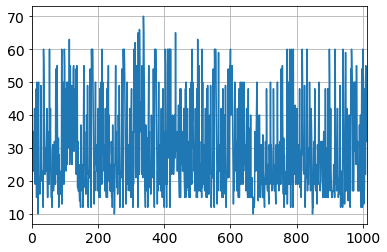

In [13]:
#checking age distribution
df["age"].plot()

#### 1.3.2 Checking outliers

Text(0.5, 1.0, 'All Patients by Age')

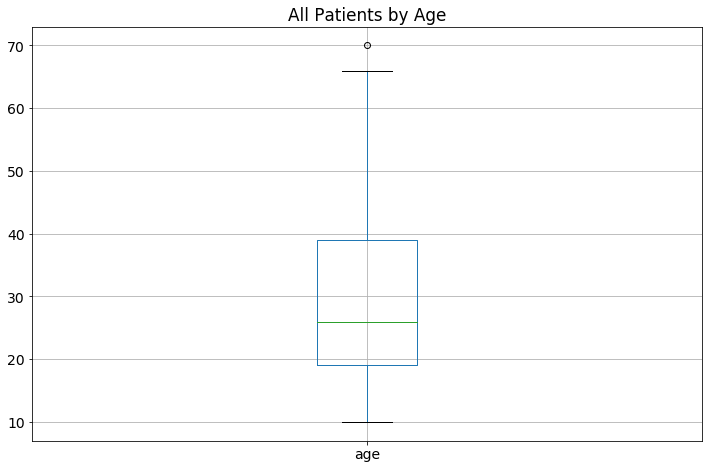

In [14]:
#Checking age outliers
df.boxplot(column = "age", figsize = (12,7.62)).set_title("All Patients by Age")

Do not remove outliers as maternal data usually has a vide span of age.

In [15]:
#create age categories
bins = [0, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 200]
labels = ["Under 20", "20 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49",
          "50 to 54", "55 to 59", "60 to 64", "65 and over"
         ]
df["age_group"] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()

,id,age,systolicBP,diastolicBP,bs,body_temp,heart_rate,risk_level,risk,age_group
0,0,35,140,90,13.00,98.0,70,high risk,Risk,35 to 39
1,1,29,90,70,8.00,100.0,80,high risk,Risk,25 to 29
2,2,30,140,85,7.00,98.0,70,high risk,Risk,30 to 34
3,3,35,120,60,6.10,98.0,76,low risk,Low Risk,35 to 39
4,4,23,140,80,7.01,98.0,70,high risk,Risk,20 to 24


In [16]:
#Check age assigned
agesort = df.age_group.unique()
agesort

[35 to 39, 25 to 29, 30 to 34, 20 to 24, 40 to 44, ..., 45 to 49, 50 to 54, 60 to 64, 55 to 59, 65 and over]
Length: 11
Categories (11, object): [Under 20 < 20 to 24 < 25 to 29 < 30 to 34 ... 50 to 54 < 55 to 59 < 60 to 64 < 65 and over]

In [17]:
#Create dataframe: number patients per age group
dfcheck1 = df
dfcheck2 = dfcheck1.groupby(by="age_group", as_index=False).agg({"id": pd.Series.nunique})
dfcheck2['total_number_of_patients'] = dfcheck2['id']
pd.set_option('display.max_rows', None)

print(dfcheck2)

      age_group   id  total_number_of_patients
0      Under 20  279                       279
1      20 to 24  179                       179
2      25 to 29  127                       127
3      30 to 34  110                       110
4      35 to 39   66                        66
5      40 to 44   69                        69
6      45 to 49   45                        45
7      50 to 54   56                        56
8      55 to 59   40                        40
9      60 to 64   37                        37
10  65 and over    5                         5


In [18]:
#Create dataframe: number of risk patients per age group
risks = df[df['risk'] == "Risk"]
riskdf = risks.groupby(by="age_group", as_index=False).agg({"id": pd.Series.nunique})
riskdf['number_of_patients'] = riskdf['id']
pd.set_option('display.max_rows', None)

print(riskdf)

      age_group   id  number_of_patients
0      Under 20  140                 140
1      20 to 24   68                  68
2      25 to 29   97                  97
3      30 to 34   77                  77
4      35 to 39   45                  45
5      40 to 44   52                  52
6      45 to 49   28                  28
7      50 to 54   50                  50
8      55 to 59   26                  26
9      60 to 64   23                  23
10  65 and over    1                   1


In [19]:
#Create age group df with % at Risk from total
riskdf2 = pd.DataFrame({"age_group": dfcheck2["age_group"], 
                              "total_number_of_patients": dfcheck2["total_number_of_patients"],
                              "number_of_patients": riskdf["number_of_patients"]})
riskdf2['percent_patients'] = (riskdf2['number_of_patients']/ riskdf2['total_number_of_patients']).round(2)
                       
riskdf2.sort_values(by=["age_group"])

,age_group,total_number_of_patients,number_of_patients,percent_patients
0,Under 20,279,140,0.50
1,20 to 24,179,68,0.38
2,25 to 29,127,97,0.76
3,30 to 34,110,77,0.70
4,35 to 39,66,45,0.68
5,40 to 44,69,52,0.75
6,45 to 49,45,28,0.62
7,50 to 54,56,50,0.89
8,55 to 59,40,26,0.65
9,60 to 64,37,23,0.62


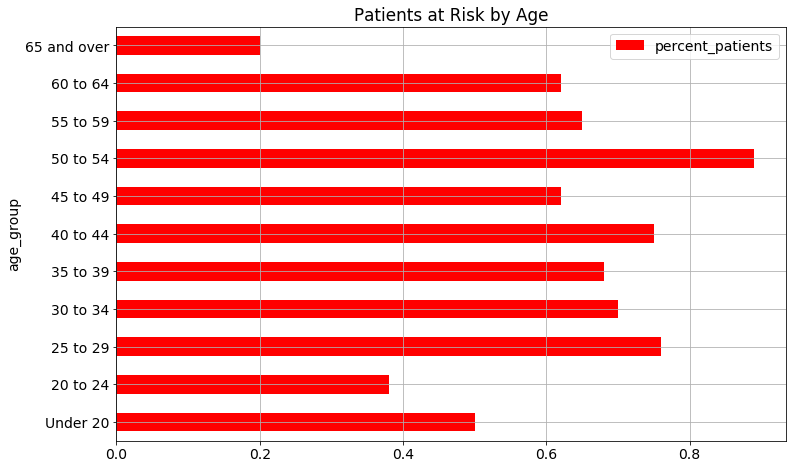

In [20]:
plot_riskdf2 = riskdf2.dropna()
plot_riskdf2.plot(kind = "barh",x = "age_group", y = "percent_patients", color = "red", figsize = (12,7.62), title = "Patients at Risk by Age")

In [21]:
#Create dataframe: number of low risk patients per age group
lowrisks = df[df['risk'] == "Low Risk"]
lowriskdf = lowrisks.groupby(by="age_group", as_index=False).agg({"id": pd.Series.nunique})
lowriskdf['number_of_patients'] = lowriskdf['id']
pd.set_option('display.max_rows', None)

print(lowriskdf)

      age_group   id  number_of_patients
0      Under 20  139                 139
1      20 to 24  111                 111
2      25 to 29   30                  30
3      30 to 34   33                  33
4      35 to 39   21                  21
5      40 to 44   17                  17
6      45 to 49   17                  17
7      50 to 54    6                   6
8      55 to 59   14                  14
9      60 to 64   14                  14
10  65 and over    4                   4


In [22]:
#Create age group df with % Low Risk from total
lowriskdf2 = pd.DataFrame({"age_group": dfcheck2["age_group"], 
                              "total_number_of_patients": dfcheck2["total_number_of_patients"],
                              "number_of_patients": lowriskdf["number_of_patients"]})
lowriskdf2['percent_patients'] = (lowriskdf2['number_of_patients']/ lowriskdf2['total_number_of_patients']).round(2)
                       
lowriskdf2.sort_values(by=["age_group"])

,age_group,total_number_of_patients,number_of_patients,percent_patients
0,Under 20,279,139,0.50
1,20 to 24,179,111,0.62
2,25 to 29,127,30,0.24
3,30 to 34,110,33,0.30
4,35 to 39,66,21,0.32
5,40 to 44,69,17,0.25
6,45 to 49,45,17,0.38
7,50 to 54,56,6,0.11
8,55 to 59,40,14,0.35
9,60 to 64,37,14,0.38


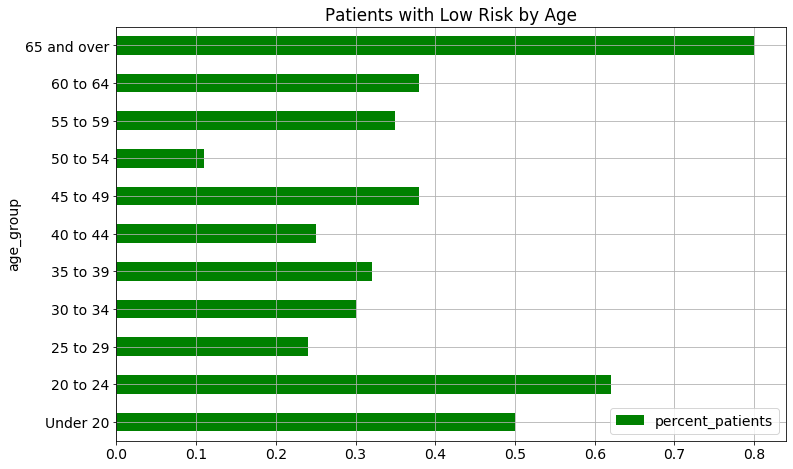

In [23]:
plot_lowriskdf2 = lowriskdf2.dropna()
plot_lowriskdf2.plot(kind = "barh",x = "age_group", y = "percent_patients", color = "green", figsize = (12,7.62), title = "Patients with Low Risk by Age")

Different distribution as at risk patients.

In [24]:
#Create dataframe: number of all patients per age group
everyone = df
alldf = everyone.groupby(by="age_group", as_index=False).agg({"id": pd.Series.nunique})
alldf['number_of_patients'] = alldf['id']
pd.set_option('display.max_rows', None)

print(alldf)

      age_group   id  number_of_patients
0      Under 20  279                 279
1      20 to 24  179                 179
2      25 to 29  127                 127
3      30 to 34  110                 110
4      35 to 39   66                  66
5      40 to 44   69                  69
6      45 to 49   45                  45
7      50 to 54   56                  56
8      55 to 59   40                  40
9      60 to 64   37                  37
10  65 and over    5                   5


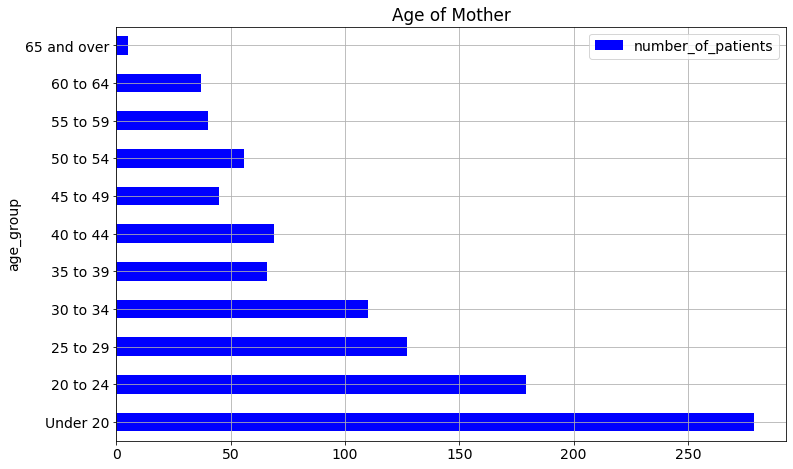

In [25]:
#All patients by age group
plot_allrisk_df = alldf.dropna()
plot_allrisk_df.plot(kind = "barh",x = "age_group", y = "number_of_patients", color = "blue", figsize = (12,7.62), title = "Age of Mother")

### 1.4 Encoding

In [26]:
#Create dictionary
d = defaultdict(LabelEncoder)

In [27]:
dfenc = df
fit = dfenc.apply(lambda x: d[x.name].fit_transform(x))

In [28]:
dfenc.head()

,id,age,systolicBP,diastolicBP,bs,body_temp,heart_rate,risk_level,risk,age_group
0,0,35,140,90,13.00,98.0,70,high risk,Risk,35 to 39
1,1,29,90,70,8.00,100.0,80,high risk,Risk,25 to 29
2,2,30,140,85,7.00,98.0,70,high risk,Risk,30 to 34
3,3,35,120,60,6.10,98.0,76,low risk,Low Risk,35 to 39
4,4,23,140,80,7.01,98.0,70,high risk,Risk,20 to 24


In [29]:
#Encoding
dfenc = df.apply(LabelEncoder().fit_transform)
dfenc.head()

,id,age,systolicBP,diastolicBP,bs,body_temp,heart_rate,risk_level,risk,age_group
0,0,24,17,13,23,0,6,0,1,3
1,1,18,7,7,18,4,11,0,1,1
2,2,19,17,11,9,0,6,0,1,2
3,3,24,13,2,1,0,8,1,0,3
4,4,12,17,10,10,0,6,0,1,0


In [30]:
# Inverse the encoded (unhash and paste where and if needed)
#fit.apply(lambda x: d[x.name].inverse_transform(x))

In [31]:
print(dfenc)

        id  age  systolicBP  diastolicBP  bs  body_temp  heart_rate  risk_level  risk  age_group
0        0   24          17           13  23          0           6           0     1          3
1        1   18           7            7  18          4          11           0     1          1
2        2   19          17           11   9          0           6           0     1          2
3        3   24          13            2   1          0           8           1     0          3
4        4   12          17           10  10          0           6           0     1          0
5        5   12          15            7  10          0          10           2     1          0
6        6   24           6            2  21          6          13           0     1          3
7        7   21          13           13   8          0           6           2     1          2
8        8   31          15           10  27          0           6           0     1          4
9        9   12           7   

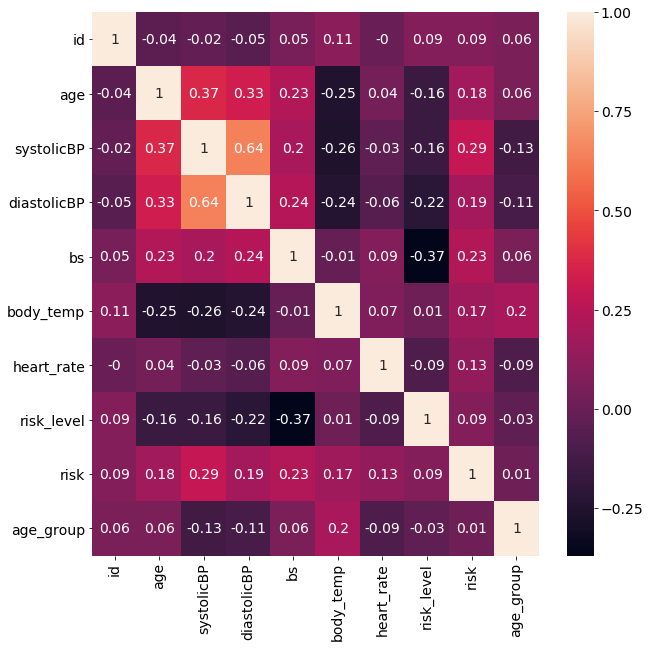

In [32]:
correlationdf = dfenc.corr(method = 'kendall').round(decimals=2)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlationdf, color = "blue", annot = True)

plt.show()

### 1.5 Splitting data to Test and Train

In [33]:
# Trget and features
target = dfenc["risk"]
df_independent_removeRiskLevel = dfenc.drop("risk_level", axis=1)

#Check independent
df_independent_removeRiskLevel.head()

,id,age,systolicBP,diastolicBP,bs,body_temp,heart_rate,risk,age_group
0,0,24,17,13,23,0,6,1,3
1,1,18,7,7,18,4,11,1,1
2,2,19,17,11,9,0,6,1,2
3,3,24,13,2,1,0,8,0,3
4,4,12,17,10,10,0,6,1,0


In [34]:
df_independent = df_independent_removeRiskLevel.drop("risk", axis=1)
df_independent.head()

,id,age,systolicBP,diastolicBP,bs,body_temp,heart_rate,age_group
0,0,24,17,13,23,0,6,3
1,1,18,7,7,18,4,11,1
2,2,19,17,11,9,0,6,2
3,3,24,13,2,1,0,8,3
4,4,12,17,10,10,0,6,0


In [35]:
# Split into train and test data
X = df_independent.values
X_train, X_test, y_train, y_test  = train_test_split(X, target,
                                                     test_size = 0.3)
print("Data split.")

Data split.


In [36]:
#Change numpy to df
dfnp = pd.DataFrame(X_test)
dfnp.head()
#Create CSV to check (unhash if needed)
#dfnp.to_csv("testdataXtest.csv")

,0,1,2,3,4,5,6,7
0,743,18,7,7,6,0,11,1
1,789,1,13,13,7,0,11,10
2,958,6,11,8,22,5,8,10
3,325,48,6,2,8,0,13,9
4,881,18,10,7,7,0,11,1


### 1.5 Setting Global Functions

In [37]:
#Evaluation results
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    #Printing    
    print("TESTING RESULTS FOR: " +str(model) + "\n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
    
print("Function created.")

Function created.


In [38]:
def plot_feature_importance(clf, colour, classifier_name, one_hot_df_indep):   
    features_log = pd.DataFrame(clf.feature_importances_, index = df_independent.columns.tolist(), 
                            columns = ['Importance'])
    features_log = features_log.sort_values(by='Importance', ascending=True)

    features_log.plot(kind='barh', figsize=(10,8), color = colour)
    plt.xlabel('Feature importance')
    plt.title('Feature importance for {}'.format(classifier_name))   
    return None


print("Function created.")

Function created.


In [39]:
#Create GlobalEvaluation function
def global_evaluation(model):
    #_____________________________
    #PRINTING
    print("ALL DATA RESULTS FOR: " + str(model) + "\n===============================")
    #Number of rows
    rows = dftest.shape[0]
    print("Total number of instances: " + str(rows))
    # Count number of wrongly classified instances
    wrongrows = dftest.loc[dftest.test == "Incorrect", "test"].count()
    print("Total number of wrongly classified instances: " + str(wrongrows))
    # % wrongly classified instances
    wrongpercentR = wrongrows/rows
    wrongpercent = "{:.2%}".format(wrongpercentR)
    print("Percent of wrongly classified instances: " + str(wrongpercent))
    #Accuracy
    acc = 1.0 - wrongpercentR
    #acc = "{:.2%}".format(acc)
    print("Accuracy: " + str(acc))
    print("\n")
    print("'RISK' RESULTS FOR: " + str(model) + "\n===============================")
    # Count number of wrongly classified instances
    wrongrows_r = dftest_r.loc[dftest_r.test == "Incorrect", "test"].count()
    print("Total number of wrongly classified instances  'Risk': " + str(wrongrows_r))
    # % wrongly classified instances
    wrongpercentR_r = wrongrows_r/rows
    print("Percent of wrongly classified instances 'Risk': " + str(wrongpercentR_r))
print("Function created.")    

Function created.


In [40]:
#Creating function for Accuracy and False Negatives for Patients over the ahe of 40
def over40_evaluation (model):
    #Get only above 40 age
    dfover40 = dftest[dftest.age >= 40]
    #Getting percentage wrongly classified 'Risk' data for instances over the age 40
    #Get only above 40 age at 'Risk'
    dfover40_r = dftest_r[dftest_r.age >= 40]
    #_________________________________
    #PRINTING
    print("PATIENTS OVER 40 RESULTS FOR: " + str(model) + "\n===============================")
    #Number of rows
    rows40 = dfover40.shape[0]
    print("Instances over age 40: " + str(rows40))
    # Count number of wrongly classified instancesover 40
    wrongrows40 = dfover40.loc[dfover40.test == "Incorrect", "test"].count()
    print("Wrongly classified instances over 40: " + str(wrongrows40))
    # % wrongly classified instances
    wrongpercentR40 = wrongrows40/rows40
    wrongpercent40 = "{:.2%}".format(wrongpercentR40)
    print("% of wrongly classified instances over 40: " + wrongpercent40)
    #Accuracy
    acc = 1.0 - wrongpercentR40
    #acc = "{:.2%}".format(acc)
    print("Accuracy over 40: " + str(acc))
    print("\n")
    print("PATIENTS OVER 40 'RISK' RESULTS FOR: " + str(model) + "\n===============================")
    #Number of rows
    rows40r = dfover40_r.shape[0]
    #print("Instances at 'Risk' over age 40: " + str(rows40r))
    # Count number of wrongly classified instancesover 40
    wrongrows40 = dfover40_r.loc[dfover40_r.test == "Incorrect", "test"].count()
    print("Wrongly classified 'Risk' instances over 40: " + str(wrongrows40))
    # % wrongly classified instances
    wrongpercentR40 = wrongrows40/rows40
    print("% of wrongly classified 'Risk' instances over 40: " + str(wrongpercentR40))    
print("Function created.")

Function created.


## 2.0 Single Classification Tree

### 2.1 Single Classification Tree (no hyperparameters)

In [41]:
#Fit Decision Tree
decision_tree = DecisionTreeClassifier(
                               random_state = 42
                                )
    
decision_tree.fit(X_train, y_train)

proba_decision_tree = decision_tree.predict_proba(X_test)
print("Decision tree fitted.")

Decision tree fitted.


In [42]:
print(decision_tree.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


#### 2.1.1 Define test dataftame and False Negatives - Single Classification Tree

In [43]:
#Define test dataftame and False Negatives
#Getting percentage wrongly classified data 
#setting  model
model = decision_tree
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 2.1.2 Single Classification Tree Evaluation (no hyperparameters)

In [44]:
#Predicting results
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: DecisionTreeClassifier(random_state=42)
CONFUSION MATRIX:
[[101  15]
 [ 16 172]]
ACCURACY SCORE:
0.8980
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.863248    0.919786  0.898026    0.891517      0.898212
recall       0.870690    0.914894  0.898026    0.892792      0.898026
f1-score     0.866953    0.917333  0.898026    0.892143      0.898109
support    116.000000  188.000000  0.898026  304.000000    304.000000


In [45]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: DecisionTreeClassifier(random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 31
Percent of wrongly classified instances: 10.20%
Accuracy: 0.8980263157894737


'RISK' RESULTS FOR: DecisionTreeClassifier(random_state=42)
Total number of wrongly classified instances  'Risk': 16
Percent of wrongly classified instances 'Risk': 0.05263157894736842


In [47]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: DecisionTreeClassifier(random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 2
% of wrongly classified instances over 40: 6.90%
Accuracy over 40: 0.9310344827586207


PATIENTS OVER 40 'RISK' RESULTS FOR: DecisionTreeClassifier(random_state=42)
Wrongly classified 'Risk' instances over 40: 1
% of wrongly classified 'Risk' instances over 40: 0.034482758620689655


In [48]:
#Get the confusion matrix
y_pred = decision_tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[101  15]
 [ 16 172]]


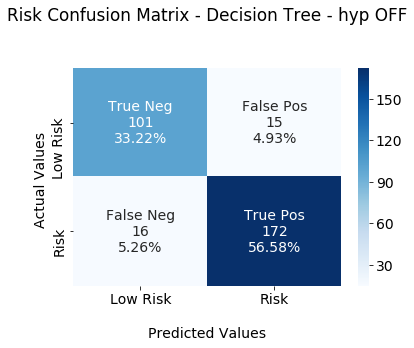

In [49]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Risk Confusion Matrix - Decision Tree - hyp OFF\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low Risk','Risk'])
ax.yaxis.set_ticklabels(['Low Risk','Risk'])

## Display the visualization of the Confusion Matrix.
plt.show()

Feature number 0 id : 0.3817517024121953
Feature number 1 age : 0.06727616954015549
Feature number 2 systolicBP : 0.09433628660088851
Feature number 3 diastolicBP : 0.026228559485972167
Feature number 4 bs : 0.31836600693893696
Feature number 5 body_temp : 0.04547097129362959
Feature number 6 heart_rate : 0.015924769624903853
Feature number 7 age_group : 0.050645534103318075


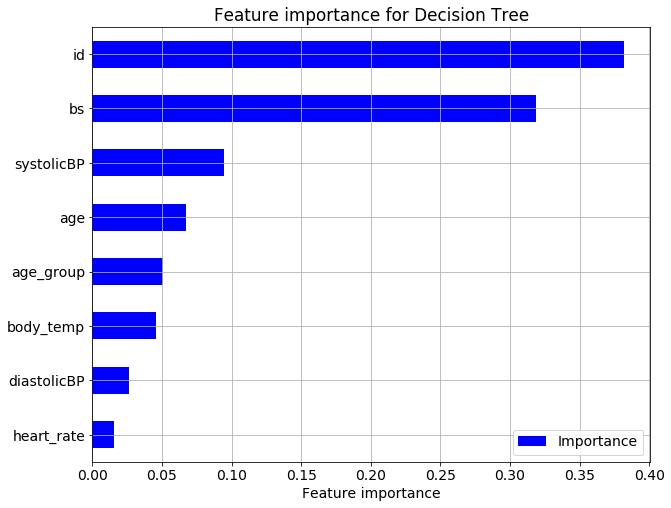

In [50]:
# decision tree - feature importance
# get importance
importance = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature number {i} {df_independent.columns[i]} : {v}')

# plot feature importance
plot_feature_importance(decision_tree,"blue","Decision Tree", df_independent)
plt.show()

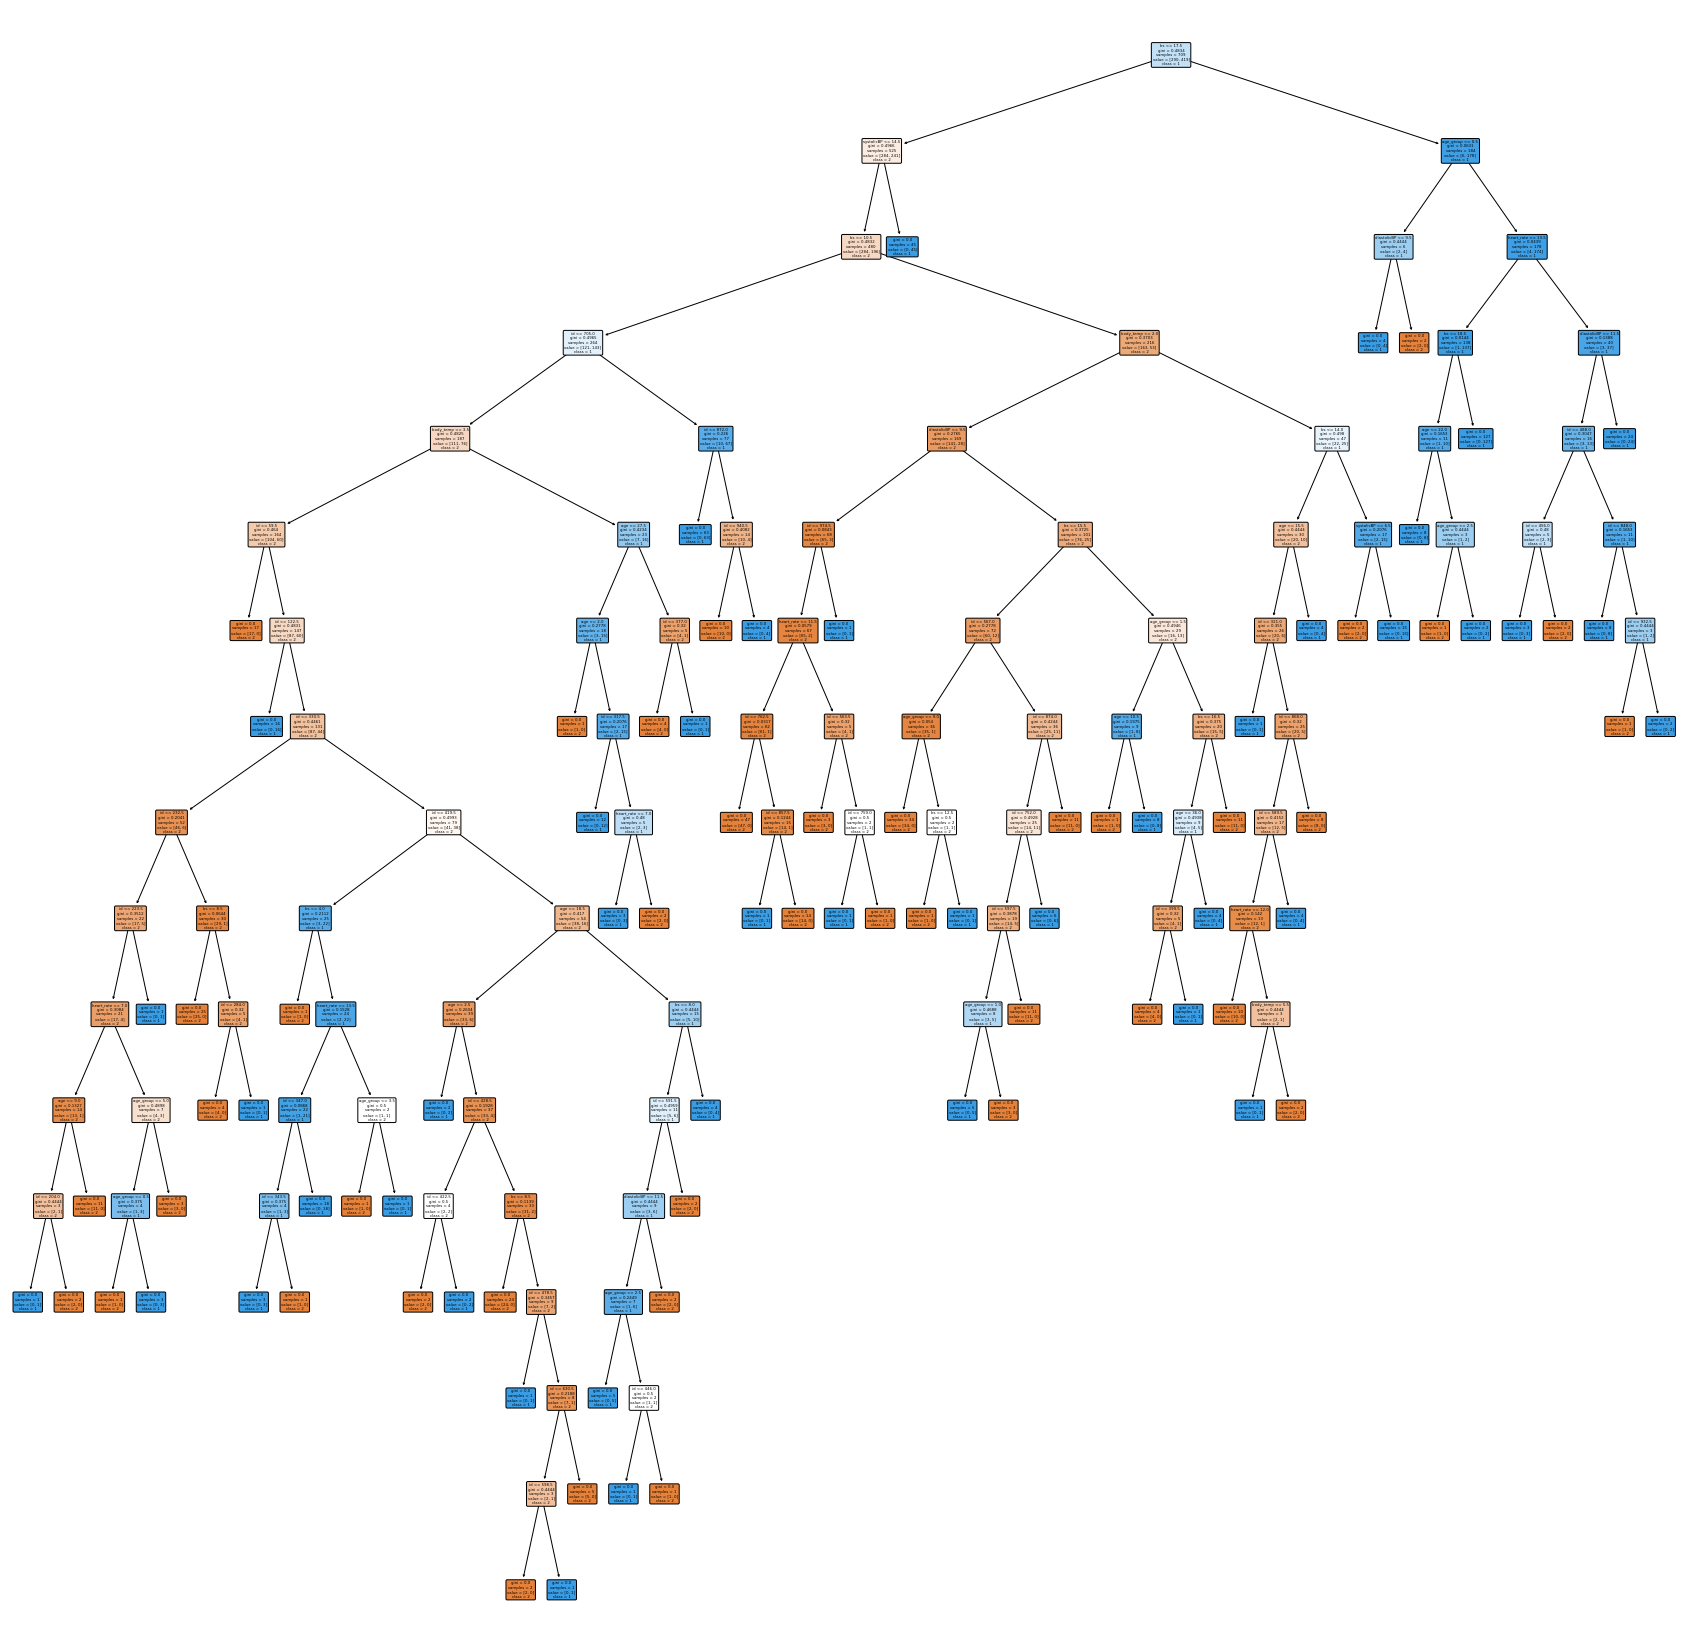

In [51]:
# Visualising
plt.figure(figsize = (30,30))
dec_tree = plot_tree(decision_tree= decision_tree, feature_names = df_independent.columns, 
                     class_names =["2","1", "0"] , filled = True , precision = 4, rounded = True)

### 2.2 Single Classification Tree Evaluation with RANDOM hyperparameters

In [52]:
#Search Decision Tree RANDOM parameters 
decision_tree_criterion = ['gini', 'entropy']
decision_tree_splitter = ['best', 'random']
decision_tree_max_depth = [int(x) for x in np.linspace(5, 55, num = 5)]


decision_tree_params = {"criterion": decision_tree_criterion,
               "splitter": decision_tree_splitter,
               "max_depth": decision_tree_max_depth, 
              }

n_iter = 50

decision_tree_search_input = DecisionTreeClassifier(random_state = 42)

decision_tree_random_search = RandomizedSearchCV(
                decision_tree_search_input, 
                decision_tree_params, 
                n_jobs = -1, 
                cv = 5, 
                scoring='recall', 
                n_iter= 10
                );


decision_tree_random_search.fit(X_train, y_train)

print("Searching parameters completed.") 
print(decision_tree_params)

Searching parameters completed.
{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [5, 17, 30, 42, 55]}


In [53]:
decision_tree_best_params = decision_tree_random_search.best_params_
decision_tree_best_params

{'splitter': 'best', 'max_depth': 42, 'criterion': 'entropy'}

In [54]:
#Fit tuned Decision Tree (Random hyperparameters)
decision_tree_hon = DecisionTreeClassifier(
                               random_state = 42,
                               criterion = decision_tree_best_params["criterion"],
                               splitter = decision_tree_best_params["splitter"],
                               max_depth = decision_tree_best_params["max_depth"]
                               )

decision_tree_hon.fit(X_train, y_train)
proba_decision_tree_hon = decision_tree_hon.predict_proba(X_test)
pred_decision_tree_hon = np.where(proba_decision_tree_hon[:,1] > 0.3, 1, 0)

print("Tuned Decision Tree fitted.")

Tuned Decision Tree fitted.


In [55]:
print(decision_tree_hon.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 42, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


#### 2.2.1 Dataframe -  Single Classification Tree Evaluation with RANDOM hyperparameters

In [56]:
#Define test dataftame and False Negatives

#Getting percentage wrongly classified data 
#setting  model
model = decision_tree_hon
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 2.2.2 Single Classification Tree Evaluation with RANDOM hyperparameters

In [57]:
#Predicting results
#model = decision_tree_hon
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: DecisionTreeClassifier(criterion='entropy', max_depth=42, random_state=42)
CONFUSION MATRIX:
[[104  12]
 [ 12 176]]
ACCURACY SCORE:
0.9211
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.896552    0.93617  0.921053    0.916361      0.921053
recall       0.896552    0.93617  0.921053    0.916361      0.921053
f1-score     0.896552    0.93617  0.921053    0.916361      0.921053
support    116.000000  188.00000  0.921053  304.000000    304.000000


In [58]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: DecisionTreeClassifier(criterion='entropy', max_depth=42, random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 24
Percent of wrongly classified instances: 7.89%
Accuracy: 0.9210526315789473


'RISK' RESULTS FOR: DecisionTreeClassifier(criterion='entropy', max_depth=42, random_state=42)
Total number of wrongly classified instances  'Risk': 12
Percent of wrongly classified instances 'Risk': 0.039473684210526314


In [59]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: DecisionTreeClassifier(criterion='entropy', max_depth=42, random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 1
% of wrongly classified instances over 40: 3.45%
Accuracy over 40: 0.9655172413793104


PATIENTS OVER 40 'RISK' RESULTS FOR: DecisionTreeClassifier(criterion='entropy', max_depth=42, random_state=42)
Wrongly classified 'Risk' instances over 40: 0
% of wrongly classified 'Risk' instances over 40: 0.0


### 2.3 Single Classification Tree with GRID hyperparameters

In [ ]:
# define model
model = DecisionTreeClassifier()

In [60]:
#Search Decision Tree GRID parameters 
decision_tree_criterion = ['gini']
decision_tree_splitter = ['best', 'random']
decision_tree_max_depth = [int(x) for x in np.linspace(35, 50, num = 3)]

decision_tree_params = {"criterion": decision_tree_criterion,
               "splitter": decision_tree_splitter,
               "max_depth": decision_tree_max_depth, 
              }


decision_tree_search_input = DecisionTreeClassifier(random_state = 42)

decision_tree_grid_search = GridSearchCV(
                                        decision_tree_search_input, 
                                        decision_tree_params, 
                                        n_jobs = -1, 
                                        cv = 5, 
                                        scoring='recall', 
                                          );

decision_tree_grid_search.fit(X_train, y_train)

print("Searching parameters completed.") 
print(decision_tree_params)

Searching parameters completed.
{'criterion': ['gini'], 'splitter': ['best', 'random'], 'max_depth': [35, 42, 50]}


In [61]:
decision_tree_best_params = decision_tree_grid_search.best_params_
decision_tree_best_params

{'criterion': 'gini', 'max_depth': 35, 'splitter': 'best'}

In [62]:
#Fit tuned Decision Tree (Grid hyperparameters)
decision_tree_hon = DecisionTreeClassifier(random_state = 42,
                               criterion = decision_tree_best_params['criterion'],
                               splitter = decision_tree_best_params['splitter'],
                               max_depth = decision_tree_best_params['max_depth']
                                )

decision_tree_hon.fit(X_train, y_train)
proba_decision_tree_hon = decision_tree_hon.predict_proba(X_test)
pred_decision_tree_hon = np.where(proba_decision_tree_hon[:,1] > 0.3, 1, 0)

print("Tuned Decision Tree fitted.")

Tuned Decision Tree fitted.


In [63]:
print(decision_tree_hon.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 35, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


#### 2.3.1 Dataframe - Single Classification Tree with GRID hyperparameters

In [64]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = decision_tree_hon
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 2.3.2 Single Classification Tree Evaluation with GRID hyperparameters

In [65]:
#Predicting results
model = decision_tree_hon
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: DecisionTreeClassifier(max_depth=35, random_state=42)
CONFUSION MATRIX:
[[101  15]
 [ 16 172]]
ACCURACY SCORE:
0.8980
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.863248    0.919786  0.898026    0.891517      0.898212
recall       0.870690    0.914894  0.898026    0.892792      0.898026
f1-score     0.866953    0.917333  0.898026    0.892143      0.898109
support    116.000000  188.000000  0.898026  304.000000    304.000000


In [66]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: DecisionTreeClassifier(max_depth=35, random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 31
Percent of wrongly classified instances: 10.20%
Accuracy: 0.8980263157894737


'RISK' RESULTS FOR: DecisionTreeClassifier(max_depth=35, random_state=42)
Total number of wrongly classified instances  'Risk': 16
Percent of wrongly classified instances 'Risk': 0.05263157894736842


In [67]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: DecisionTreeClassifier(max_depth=35, random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 2
% of wrongly classified instances over 40: 6.90%
Accuracy over 40: 0.9310344827586207


PATIENTS OVER 40 'RISK' RESULTS FOR: DecisionTreeClassifier(max_depth=35, random_state=42)
Wrongly classified 'Risk' instances over 40: 1
% of wrongly classified 'Risk' instances over 40: 0.034482758620689655


## 3.0 Bagging of Trees

### 3.1 Bagging of Trees  (no hyperparameters)

In [68]:
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(
                                random_state = 42
                                )
bagging_clf.fit(X_train, y_train)

print("Bagging fitted.")

Bagging fitted.


In [69]:
print(bagging_clf.get_params())

{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 3.1.1. Dataframe - Bagging of Trees  (no hyperparameters)

In [70]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = bagging_clf
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 3.1.2 Tree Bagged Evaluation (no hyperparameters)

In [71]:
#Evaluate results
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: BaggingClassifier(random_state=42)
CONFUSION MATRIX:
[[109   7]
 [ 15 173]]
ACCURACY SCORE:
0.9276
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.879032    0.961111  0.927632    0.920072      0.929792
recall       0.939655    0.920213  0.927632    0.929934      0.927632
f1-score     0.908333    0.940217  0.927632    0.924275      0.928051
support    116.000000  188.000000  0.927632  304.000000    304.000000


In [72]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: BaggingClassifier(random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 22
Percent of wrongly classified instances: 7.24%
Accuracy: 0.9276315789473684


'RISK' RESULTS FOR: BaggingClassifier(random_state=42)
Total number of wrongly classified instances  'Risk': 15
Percent of wrongly classified instances 'Risk': 0.049342105263157895


In [74]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: BaggingClassifier(random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 2
% of wrongly classified instances over 40: 6.90%
Accuracy over 40: 0.9310344827586207


PATIENTS OVER 40 'RISK' RESULTS FOR: BaggingClassifier(random_state=42)
Wrongly classified 'Risk' instances over 40: 1
% of wrongly classified 'Risk' instances over 40: 0.034482758620689655


In [75]:
#Get the confusion matrix
y_pred = bagging_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[109   7]
 [ 15 173]]


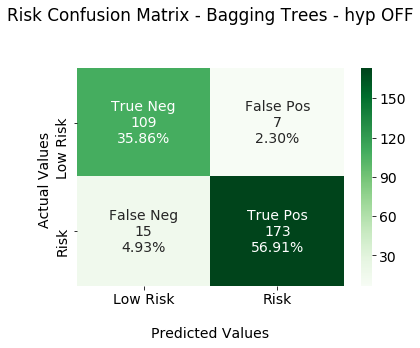

In [76]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

ax.set_title('Risk Confusion Matrix - Bagging Trees - hyp OFF\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low Risk','Risk'])
ax.yaxis.set_ticklabels(['Low Risk','Risk'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [77]:
#Bagging - feature importance
# get importance
importance = bagging_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature number {i} {df_independent.columns[i]} : {v}')

# plot feature importance
plot_feature_importance(bagging_clf,"green","Bagging", df_independent)
plt.show()

AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

### 3.2 Bagging of Trees  with RANDOM hyperparameters

In [82]:
#Search Bagged Tree RANDOM Classifier 

bagging_clf_base_estimator = ['tree']
bagging_clf_base_n_estimators = [int(x) for x in np.linspace(100, 500, num = 11)]
bagging_clf_base_max_features = [int(x) for x in np.linspace(2, 8, num = 3)]

bagging_clf_params = {
                     "n_estimators": bagging_clf_base_n_estimators,
                    "max_features": bagging_clf_base_max_features
                       }

bagging_clf_random_search_input = BaggingClassifier(random_state = 42)

bagging_clf_random_search = RandomizedSearchCV(
                                        bagging_clf_random_search_input, 
                                        bagging_clf_params,
                                        n_jobs = -1, 
                                        cv = 5, 
                                        scoring='recall', 
                                        n_iter= 10
                                        );    


bagging_clf_random_search.fit(X_train, y_train)

print("Searching parameters completed.") 
print(bagging_clf_params)

Searching parameters completed.
{'n_estimators': [100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500], 'max_features': [2, 5, 8]}


In [83]:
bagging_clf_best_params = bagging_clf_random_search.best_params_
bagging_clf_best_params

{'n_estimators': 340, 'max_features': 2}

In [84]:
#Fit tuned Bagged Tree (Random hyperparameters)
bagging_clf_hon = BaggingClassifier(
                               random_state = 42,
                               n_estimators = bagging_clf_best_params["n_estimators"],
                               max_features = bagging_clf_best_params["max_features"]
                               )

bagging_clf_hon.fit(X_train, y_train)
proba_bagging_clf_hon = bagging_clf_hon.predict_proba(X_test)
pred_bagging_clf_hon = np.where(proba_bagging_clf_hon[:,1] > 0.3, 1, 0)

print("Tuned Bagged Tree fitted.")

Tuned Bagged Tree fitted.


In [85]:
print(bagging_clf_hon.get_params())

{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 2, 'max_samples': 1.0, 'n_estimators': 340, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 3.2.1 Dataframe - Bagging of Trees  with RANDOM hyperparameters

In [86]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = bagging_clf_hon
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 3.2.2  Bagging of Trees Evaluation with RANDOM hyperparameters

In [87]:
#Predicting results
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=340, random_state=42)
CONFUSION MATRIX:
[[ 92  24]
 [  7 181]]
ACCURACY SCORE:
0.8980
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.929293    0.882927  0.898026    0.906110      0.900619
recall       0.793103    0.962766  0.898026    0.877935      0.898026
f1-score     0.855814    0.921120  0.898026    0.888467      0.896200
support    116.000000  188.000000  0.898026  304.000000    304.000000


In [88]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=340, random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 31
Percent of wrongly classified instances: 10.20%
Accuracy: 0.8980263157894737


'RISK' RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=340, random_state=42)
Total number of wrongly classified instances  'Risk': 7
Percent of wrongly classified instances 'Risk': 0.023026315789473683


In [89]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=340, random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 5
% of wrongly classified instances over 40: 17.24%
Accuracy over 40: 0.8275862068965517


PATIENTS OVER 40 'RISK' RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=340, random_state=42)
Wrongly classified 'Risk' instances over 40: 0
% of wrongly classified 'Risk' instances over 40: 0.0


### 3.3 Bagging of Trees with GRID hyperparameters

In [90]:
#Search Bagged Tree GRID Classifier 
bagging_clf_base_n_estimators = [int(x) for x in np.linspace(300, 380, num = 11)]
bagging_clf_base_max_features = [int(x) for x in np.linspace(2, 5, num = 3)]

bagging_clf_params = {
                     "n_estimators": bagging_clf_base_n_estimators,
                    "max_features": bagging_clf_base_max_features
               }


bagging_clf_search_input = BaggingClassifier(random_state = 42)

bagging_clf_grid_search = GridSearchCV(
                                        bagging_clf_search_input, 
                                        bagging_clf_params,
                                        n_jobs = -1, 
                                        cv = 5, 
                                        scoring='recall', 
                                        );

bagging_clf_grid_search.fit(X_train, y_train)

print("Searching parameters completed.") 
print(bagging_clf_params)

Searching parameters completed.
{'n_estimators': [300, 308, 316, 324, 332, 340, 348, 356, 364, 372, 380], 'max_features': [2, 3, 5]}


In [91]:
bagging_clf_best_params = bagging_clf_grid_search.best_params_
bagging_clf_best_params

{'max_features': 2, 'n_estimators': 324}

In [92]:
#Fit tuned Bagged Tree (Grid hyperparameters)
bagging_clf_hon = BaggingClassifier(random_state = 42,
                               n_estimators = bagging_clf_best_params['n_estimators'],
                               max_features = bagging_clf_best_params["max_features"]
                                   )

bagging_clf_hon.fit(X_train, y_train)
proba_bagging_clf_hon = bagging_clf_hon.predict_proba(X_test)
pred_bagging_clf_hon = np.where(proba_bagging_clf_hon[:,1] > 0.3, 1, 0)

print("Tuned Bagged Tree fitted.")

Tuned Bagged Tree fitted.


In [93]:
print(bagging_clf_hon.get_params())

{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 2, 'max_samples': 1.0, 'n_estimators': 324, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 3.3.1 Dataframe - Bagging of Trees with GRID hyperparameters

In [94]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = bagging_clf_hon
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 3.3.2 Bagging of Trees Evaluation with GRID hyperparameters

In [95]:
#Predicting results
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=324, random_state=42)
CONFUSION MATRIX:
[[ 93  23]
 [  7 181]]
ACCURACY SCORE:
0.9013
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.930000    0.887255  0.901316    0.908627      0.903566
recall       0.801724    0.962766  0.901316    0.882245      0.901316
f1-score     0.861111    0.923469  0.901316    0.892290      0.899675
support    116.000000  188.000000  0.901316  304.000000    304.000000


In [96]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=324, random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 30
Percent of wrongly classified instances: 9.87%
Accuracy: 0.9013157894736842


'RISK' RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=324, random_state=42)
Total number of wrongly classified instances  'Risk': 7
Percent of wrongly classified instances 'Risk': 0.023026315789473683


In [97]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)


PATIENTS OVER 40 RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=324, random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 5
% of wrongly classified instances over 40: 17.24%
Accuracy over 40: 0.8275862068965517


PATIENTS OVER 40 'RISK' RESULTS FOR: BaggingClassifier(max_features=2, n_estimators=324, random_state=42)
Wrongly classified 'Risk' instances over 40: 0
% of wrongly classified 'Risk' instances over 40: 0.0


## 4.0 Random Forest

### 4.1 Random Forest (no hyperparameters)

In [1]:
rf_clf = RandomForestClassifier(
                               random_state=42
                               )
rf_clf.fit(X_train, y_train)

print("Random Forest fitted.")

NameError: name 'RandomForestClassifier' is not defined

In [99]:
print(rf_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 4.1.1 Dataframe - Random Forest (no hyperparameters)

In [100]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = rf_clf
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 4.1.2 Random Forest Evaluation (no hyperparameters)

In [101]:
#Evaluate model
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: RandomForestClassifier(random_state=42)
CONFUSION MATRIX:
[[107   9]
 [ 11 177]]
ACCURACY SCORE:
0.9342
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.906780    0.951613  0.934211    0.929196      0.934505
recall       0.922414    0.941489  0.934211    0.931952      0.934211
f1-score     0.914530    0.946524  0.934211    0.930527      0.934316
support    116.000000  188.000000  0.934211  304.000000    304.000000


In [102]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: RandomForestClassifier(random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 20
Percent of wrongly classified instances: 6.58%
Accuracy: 0.9342105263157895


'RISK' RESULTS FOR: RandomForestClassifier(random_state=42)
Total number of wrongly classified instances  'Risk': 11
Percent of wrongly classified instances 'Risk': 0.03618421052631579


In [104]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: RandomForestClassifier(random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 2
% of wrongly classified instances over 40: 6.90%
Accuracy over 40: 0.9310344827586207


PATIENTS OVER 40 'RISK' RESULTS FOR: RandomForestClassifier(random_state=42)
Wrongly classified 'Risk' instances over 40: 1
% of wrongly classified 'Risk' instances over 40: 0.034482758620689655


In [105]:
#Get the confusion matrix
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[107   9]
 [ 11 177]]


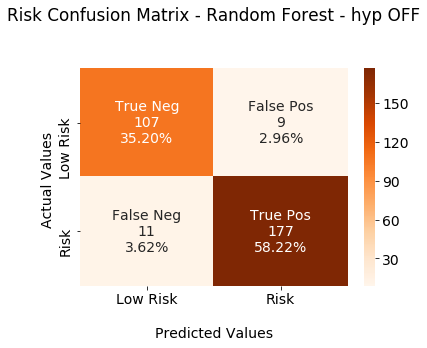

In [106]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges')

ax.set_title('Risk Confusion Matrix - Random Forest - hyp OFF\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low Risk','Risk'])
ax.yaxis.set_ticklabels(['Low Risk','Risk'])

## Display the visualization of the Confusion Matrix.
plt.show()

Feature number 0 id : 0.303550576565627
Feature number 1 age : 0.1000956088749164
Feature number 2 systolicBP : 0.12828812839085874
Feature number 3 diastolicBP : 0.06420841031126923
Feature number 4 bs : 0.2441864332605005
Feature number 5 body_temp : 0.05404606714823536
Feature number 6 heart_rate : 0.059844605318181636
Feature number 7 age_group : 0.0457801701304112


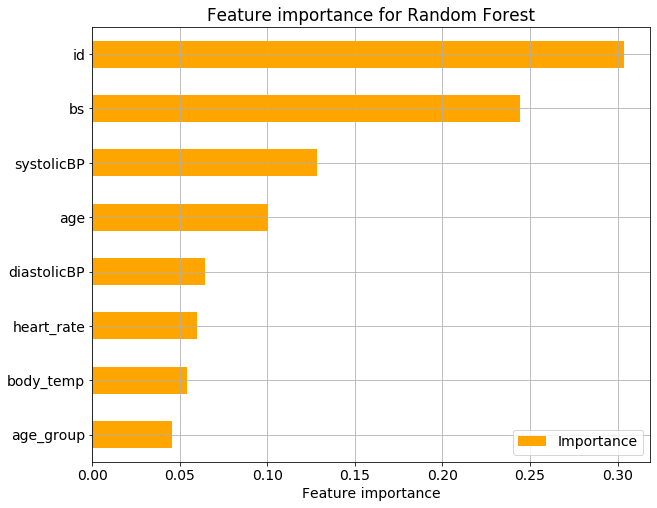

In [107]:
#Random Forest - feature importance
# get importance
importance = rf_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature number {i} {df_independent.columns[i]} : {v}')

# plot feature importance
plot_feature_importance(rf_clf,"orange","Random Forest", df_independent)
plt.show()

### 4.2 Random Forest with RANDOM hyperparameters


In [108]:
#Search Random Forest RANDOM hyperparameters
# number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(10, 500, num = 11)]
max_features = ['auto', 'sqrt'] 
# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(5, 55, num = 5)]
# minimum sample number to split a node
min_samples_split = [2, 5, 10] 
# minimum sample number that can be stored in a leaf node
min_samples_leaf = [int(x) for x in np.linspace(5, 55, num = 5)]
# method used to sample data points
bootstrap = [True, False] 

rf_params = {
            'n_estimators': n_estimators,

            'max_features': max_features,

            'max_depth': max_depth,

            'min_samples_split': min_samples_split,

            'min_samples_leaf': min_samples_leaf,

            'bootstrap': bootstrap
            }


rf_search_input = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(
                                        rf_search_input, 
                                        rf_params, 
                                        n_jobs = -1, 
                                        cv = 5, 
                                        scoring='recall', 
                                        n_iter= 10                                        
                                        );
rf_random_search.fit(X_train, y_train)

print("Searching parameters completed.") 
print(rf_params)

Searching parameters completed.
{'n_estimators': [10, 59, 108, 157, 206, 255, 304, 353, 402, 451, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, 42, 55], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [5, 17, 30, 42, 55], 'bootstrap': [True, False]}


In [109]:
rf_best_params = rf_random_search.best_params_
rf_best_params

{'n_estimators': 451,
 'min_samples_split': 5,
 'min_samples_leaf': 42,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': True}

In [112]:
#Fit tuned Random Forest (Random hyperparameters)
rf_hon = RandomForestClassifier(
                               random_state = 42,
                               n_estimators = rf_best_params["n_estimators"],
                               max_features = rf_best_params["max_features"],
                               max_depth = rf_best_params["max_depth"],
                               bootstrap = rf_best_params["bootstrap"]
                                )

rf_hon.fit(X_train, y_train)
proba_rf_hon = rf_hon.predict_proba(X_test)
pred_rf_hon = np.where(proba_rf_hon[:,1] > 0.3, 1, 0)

print("Tuned Random Forest fitted.")

Tuned Random Forest fitted.


In [113]:
print(rf_hon.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 451, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 4.2.1 Dataframe - Random Forest with RANDOM hyperparameters


In [114]:
#Define Evaluation Dataframes

#Getting percentage wrongly classified data 
#setting  model
model = rf_hon
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 4.2.2 Random Forest Evaluation with Random hyperparameters

In [115]:
#Evaluate tuned Random Forest
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=451,
                       random_state=42)
CONFUSION MATRIX:
[[105  11]
 [ 24 164]]
ACCURACY SCORE:
0.8849
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.813953    0.937143  0.884868    0.875548      0.890136
recall       0.905172    0.872340  0.884868    0.888756      0.884868
f1-score     0.857143    0.903581  0.884868    0.880362      0.885861
support    116.000000  188.000000  0.884868  304.000000    304.000000


In [116]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=451,
                       random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 35
Percent of wrongly classified instances: 11.51%
Accuracy: 0.8848684210526316


'RISK' RESULTS FOR: RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=451,
                       random_state=42)
Total number of wrongly classified instances  'Risk': 24
Percent of wrongly classified instances 'Risk': 0.07894736842105263


In [117]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=451,
                       random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 3
% of wrongly classified instances over 40: 10.34%
Accuracy over 40: 0.896551724137931


PATIENTS OVER 40 'RISK' RESULTS FOR: RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=451,
                       random_state=42)
Wrongly classified 'Risk' instances over 40: 2
% of wrongly classified 'Risk' instances over 40: 0.06896551724137931


### 4.3 Random Forest with GRID hyperparameters

In [118]:
#Search Random Forest GRID hyperparameters
#number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(400, 500, num = 11)]
max_features = ['auto', 'sqrt'] 
# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 5)]
# minimum sample number to split a node
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 2)]
# minimum sample number that can be stored in a leaf node
min_samples_leaf = [int(x) for x in np.linspace(30, 50, num = 2)]
# method used to sample data points
bootstrap = [True, False] 


rf_params = {
            'n_estimators': n_estimators,

            'max_features': max_features,

            'max_depth': max_depth,

           'min_samples_split': min_samples_split,

            'min_samples_leaf': min_samples_leaf,

            'bootstrap': bootstrap
            }


rf_search_input = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV( rf_search_input, 
                               rf_params, 
                                n_jobs = -1, 
                                cv = 5, 
                                scoring='recall', 
                                );

rf_grid_search.fit(X_train, y_train)

print("Searching parameters completed.") 
print(rf_params)

Searching parameters completed.
{'n_estimators': [400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6, 11, 15, 20], 'min_samples_split': [2, 10], 'min_samples_leaf': [30, 50], 'bootstrap': [True, False]}


In [119]:
rf_best_params = rf_grid_search.best_params_
rf_best_params

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'n_estimators': 400}

In [120]:
#Fit tuned Random Forest
rf_hon = RandomForestClassifier(
                               random_state = 42,
                               n_estimators = rf_best_params['n_estimators'],
                               max_features = rf_best_params['max_features'],
                               max_depth = rf_best_params["max_depth"],
                               bootstrap = rf_best_params["bootstrap"]
                                   )

rf_hon.fit(X_train, y_train)
proba_rf_hon = rf_hon.predict_proba(X_test)
pred_rf_hon = np.where(proba_rf_hon[:,1] > 0.3, 1, 0)

print("Tuned Random Forest fitted.")

Tuned Random Forest fitted.


In [121]:
print(rf_hon.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 4.3.1 Dataframe - Random Forest with GRID hyperparameters

In [122]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = rf_hon
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 4.3.2 Random Forest Evaluation with Grid hyperparameters

In [123]:
#Evaluate tuned Random Forest
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: RandomForestClassifier(max_depth=2, n_estimators=400, random_state=42)
CONFUSION MATRIX:
[[ 82  34]
 [ 25 163]]
ACCURACY SCORE:
0.8059
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.766355    0.827411  0.805921    0.796883      0.804113
recall       0.706897    0.867021  0.805921    0.786959      0.805921
f1-score     0.735426    0.846753  0.805921    0.791090      0.804273
support    116.000000  188.000000  0.805921  304.000000    304.000000


In [124]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: RandomForestClassifier(max_depth=2, n_estimators=400, random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 59
Percent of wrongly classified instances: 19.41%
Accuracy: 0.805921052631579


'RISK' RESULTS FOR: RandomForestClassifier(max_depth=2, n_estimators=400, random_state=42)
Total number of wrongly classified instances  'Risk': 25
Percent of wrongly classified instances 'Risk': 0.08223684210526316


In [126]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: RandomForestClassifier(max_depth=2, n_estimators=400, random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 5
% of wrongly classified instances over 40: 17.24%
Accuracy over 40: 0.8275862068965517


PATIENTS OVER 40 'RISK' RESULTS FOR: RandomForestClassifier(max_depth=2, n_estimators=400, random_state=42)
Wrongly classified 'Risk' instances over 40: 1
% of wrongly classified 'Risk' instances over 40: 0.034482758620689655


## 5.0 Extra Trees

### 5.1 Extra Trees (no hyperparameters)

In [127]:
ex_tree_clf = ExtraTreesClassifier(
                                   random_state=42
                                    )
ex_tree_clf.fit(X_train, y_train)

print("Extra Trees fitted.")

Extra Trees fitted.


In [128]:
print(ex_tree_clf.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 5.1.1 Dataframe - Extra Trees (no hyperparameters)

In [129]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = ex_tree_clf
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 5.1.2 Extra Trees Evaluation  (no hyperparameters)

In [130]:
#Evaluate model
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: ExtraTreesClassifier(random_state=42)
CONFUSION MATRIX:
[[ 95  21]
 [ 12 176]]
ACCURACY SCORE:
0.8914
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.887850    0.893401  0.891447    0.890626      0.891283
recall       0.818966    0.936170  0.891447    0.877568      0.891447
f1-score     0.852018    0.914286  0.891447    0.883152      0.890526
support    116.000000  188.000000  0.891447  304.000000    304.000000


In [131]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: ExtraTreesClassifier(random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 33
Percent of wrongly classified instances: 10.86%
Accuracy: 0.8914473684210527


'RISK' RESULTS FOR: ExtraTreesClassifier(random_state=42)
Total number of wrongly classified instances  'Risk': 12
Percent of wrongly classified instances 'Risk': 0.039473684210526314


In [132]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: ExtraTreesClassifier(random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 4
% of wrongly classified instances over 40: 13.79%
Accuracy over 40: 0.8620689655172413


PATIENTS OVER 40 'RISK' RESULTS FOR: ExtraTreesClassifier(random_state=42)
Wrongly classified 'Risk' instances over 40: 1
% of wrongly classified 'Risk' instances over 40: 0.034482758620689655


In [133]:
#Get the confusion matrix
y_pred = ex_tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[ 95  21]
 [ 12 176]]


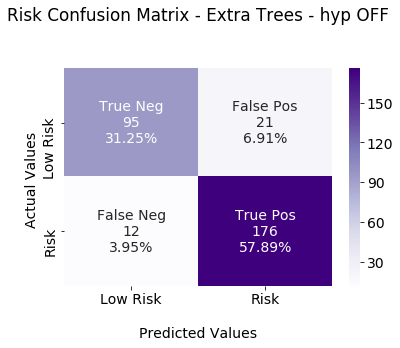

In [134]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Purples')

ax.set_title('Risk Confusion Matrix - Extra Trees - hyp OFF\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Low Risk','Risk'])
ax.yaxis.set_ticklabels(['Low Risk','Risk'])

## Display the visualization of the Confusion Matrix.
plt.show()

Feature number 0 id : 0.25590265903600673
Feature number 1 age : 0.09832219834926922
Feature number 2 systolicBP : 0.11835554789894263
Feature number 3 diastolicBP : 0.08173907293218799
Feature number 4 bs : 0.24226226059721653
Feature number 5 body_temp : 0.06827414602917208
Feature number 6 heart_rate : 0.07663077678271984
Feature number 7 age_group : 0.05851333837448491


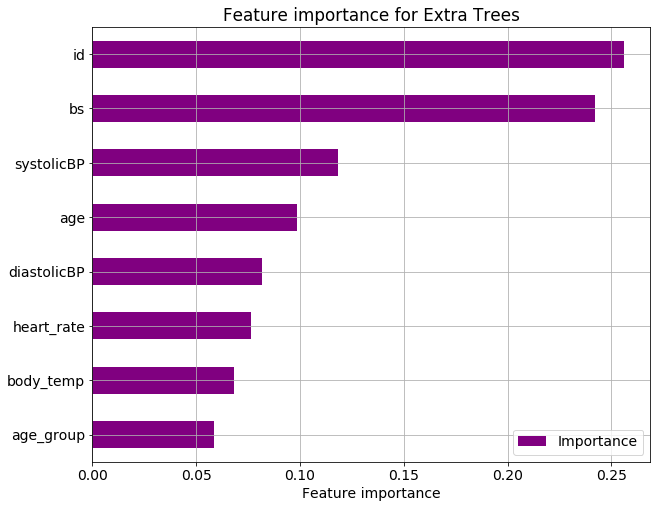

In [135]:
#Extra Trees - feature importance
# get importance
importance = ex_tree_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature number {i} {df_independent.columns[i]} : {v}')

# plot feature importance
plot_feature_importance(ex_tree_clf,"purple","Extra Trees", df_independent)
plt.show()

### 5.2 Extra Trees with RANDOM hyperparameters

In [136]:
#Search Extra Tree (RANDOM) parameters 

ex_tree_clf_ho_criterion = ['gini', 'entropy']
ex_tree_clf_ho_n_estimators = [int(x) for x in np.linspace(100, 500, num = 11)]
ex_tree_clf_ho_max_features = ['auto', 'sqrt'] 
ex_tree_clf_ho_max_depth = [int(x) for x in np.linspace(5, 55, num = 5)]
ex_tree_clf_ho_min_samples_split = [int(x) for x in np.linspace(2, 10, num = 2)]
ex_tree_clf_ho_min_samples_leaf = [int(x) for x in np.linspace(2, 52, num = 5)]

ex_tree_clf_ho_params = {
                "n_estimators": ex_tree_clf_ho_n_estimators,
                "max_features": ex_tree_clf_ho_max_features,
                "criterion": ex_tree_clf_ho_criterion,
               "max_depth": ex_tree_clf_ho_max_depth, 
               "min_samples_split": ex_tree_clf_ho_min_samples_split,
               "min_samples_leaf": ex_tree_clf_ho_min_samples_leaf
              }


ex_tree_clf_ho_input = ExtraTreesClassifier(random_state = 42)

ex_tree_clf_ho_random_search = RandomizedSearchCV(
                                                ex_tree_clf_ho_input, 
                                                ex_tree_clf_ho_params, 
                                                n_jobs = -1, 
                                                cv = 5, 
                                                scoring='recall', 
                                                n_iter= 10 
                                                );

ex_tree_clf_ho_random_search.fit(X_train, y_train)

print("Searching parameters completed.") 
print(ex_tree_clf_ho_params)

Searching parameters completed.
{'n_estimators': [100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500], 'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 17, 30, 42, 55], 'min_samples_split': [2, 10], 'min_samples_leaf': [2, 14, 27, 39, 52]}


In [137]:
ex_tree_clf_ho_best_params = ex_tree_clf_ho_random_search.best_params_
ex_tree_clf_ho_best_params

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 39,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy'}

In [140]:
#Fit tuned Extra Tree (Random hyperparameters)
ex_tree_clf_ho = ExtraTreesClassifier(
                               random_state = 42,
                               n_estimators = ex_tree_clf_ho_best_params["n_estimators"],
                               max_features = ex_tree_clf_ho_best_params["max_features"],                                      
                               criterion = ex_tree_clf_ho_best_params['criterion'],
                               max_depth = ex_tree_clf_ho_best_params['max_depth'],
                               min_samples_split = ex_tree_clf_ho_best_params["min_samples_split"],
                               min_samples_leaf = ex_tree_clf_ho_best_params["min_samples_leaf"]          
                               )

ex_tree_clf_ho.fit(X_train, y_train)
proba_ex_tree_clf_ho = ex_tree_clf_ho.predict_proba(X_test)
pred_ex_tree_clf_ho = np.where(proba_ex_tree_clf_ho[:,1] > 0.3, 1, 0)

print("Tuned Extra Tree fitted.")

Tuned Extra Tree fitted.


In [141]:
print(ex_tree_clf_ho.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 39, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 5.2.1 Dataframe - Extra Trees with RANDOM hyperparameters

In [142]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = ex_tree_clf_ho
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 5.2.2 Extra Trees Evaluation with Random hyperparameters

In [143]:
#Evaluate tuned model
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: ExtraTreesClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                     min_samples_leaf=39, min_samples_split=10,
                     n_estimators=500, random_state=42)
CONFUSION MATRIX:
[[ 55  61]
 [ 12 176]]
ACCURACY SCORE:
0.7599
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.820896    0.742616  0.759868    0.781756      0.772486
recall       0.474138    0.936170  0.759868    0.705154      0.759868
f1-score     0.601093    0.828235  0.759868    0.714664      0.741563
support    116.000000  188.000000  0.759868  304.000000    304.000000


In [144]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: ExtraTreesClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                     min_samples_leaf=39, min_samples_split=10,
                     n_estimators=500, random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 73
Percent of wrongly classified instances: 24.01%
Accuracy: 0.7598684210526316


'RISK' RESULTS FOR: ExtraTreesClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                     min_samples_leaf=39, min_samples_split=10,
                     n_estimators=500, random_state=42)
Total number of wrongly classified instances  'Risk': 12
Percent of wrongly classified instances 'Risk': 0.039473684210526314


In [145]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: ExtraTreesClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                     min_samples_leaf=39, min_samples_split=10,
                     n_estimators=500, random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 10
% of wrongly classified instances over 40: 34.48%
Accuracy over 40: 0.6551724137931034


PATIENTS OVER 40 'RISK' RESULTS FOR: ExtraTreesClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                     min_samples_leaf=39, min_samples_split=10,
                     n_estimators=500, random_state=42)
Wrongly classified 'Risk' instances over 40: 0
% of wrongly classified 'Risk' instances over 40: 0.0


### 5.3 Extra Trees with GRID hyperparameters

In [146]:
#Search Extra Tree GRID parameters 

ex_tree_clf_ho_criterion = ['gini', 'entropy']
ex_tree_clf_ho_n_estimators = [int(x) for x in np.linspace(500, 600, num = 5)]
ex_tree_clf_ho_max_features = ['auto', 'sqrt'] 
ex_tree_clf_ho_max_depth = [int(x) for x in np.linspace(2, 10, num = 3)]
ex_tree_clf_ho_min_samples_split = [int(x) for x in np.linspace(5, 15, num = 3)]
ex_tree_clf_ho_min_samples_leaf = [int(x) for x in np.linspace(30, 50, num = 2)]
    
    
ex_tree_clf_ho_params = {
                "n_estimators": ex_tree_clf_ho_n_estimators,
                "max_features": ex_tree_clf_ho_max_features,
                "criterion": ex_tree_clf_ho_criterion,
               "max_depth": ex_tree_clf_ho_max_depth, 
               "min_samples_split": ex_tree_clf_ho_min_samples_split,
               "min_samples_leaf": ex_tree_clf_ho_min_samples_leaf
              }


ex_tree_clf_ho_input = ExtraTreesClassifier(random_state = 42)

ex_tree_clf_ho_grid_search = GridSearchCV(
                                            ex_tree_clf_ho_input, 
                                            ex_tree_clf_ho_params, 
                                            n_jobs = -1, 
                                            cv = 5, 
                                            scoring='recall',    
                                            );

ex_tree_clf_ho_grid_search.fit(X_train, y_train)

print("Searching parameters completed.") 
print(ex_tree_clf_ho_params)

Searching parameters completed.
{'n_estimators': [500, 525, 550, 575, 600], 'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 6, 10], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [30, 50]}


In [147]:
ex_tree_clf_ho_best_params = ex_tree_clf_ho_grid_search.best_params_
ex_tree_clf_ho_best_params

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'n_estimators': 500}

In [148]:
#Fit tuned Extra Tree
ex_tree_clf_ho = ExtraTreesClassifier(
                               random_state = 42,
                            n_estimators = ex_tree_clf_ho_best_params["n_estimators"],
                            max_features = ex_tree_clf_ho_best_params["max_features"],
                            #max_features = 5,
                            criterion = ex_tree_clf_ho_best_params['criterion'],
                            max_depth = ex_tree_clf_ho_best_params['max_depth'],
                            min_samples_split = ex_tree_clf_ho_best_params["min_samples_split"],
                            min_samples_leaf = ex_tree_clf_ho_best_params["min_samples_leaf"]          
                                            )

ex_tree_clf_ho.fit(X_train, y_train)
proba_ex_tree_clf_ho = ex_tree_clf_ho.predict_proba(X_test)
pred_ex_tree_clf_ho = np.where(proba_ex_tree_clf_ho[:,1] > 0.3, 1, 0)

print("Tuned Extra Tree fitted.")

Tuned Extra Tree fitted.


In [149]:
print(ex_tree_clf_ho.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 50, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### 5.3.1 Dataframe - Extra Trees with GRID hyperparameters

In [150]:
#Define Evaluation Dataframe

#Getting percentage wrongly classified data 
#setting  model
model = ex_tree_clf_ho
#Check accuracy for age above
y_pred = model.predict(X_test)
y_hats2 = model.predict(X)
dftree = dfenc
dftree['y_hats'] = y_hats2
testresult = y_test
predictedresult = y_pred
dftree['test_result'] = testresult
#Add dummy values for NaN data and convert to integers
dftree["test_result"] = dftree["test_result"].fillna(2)
dftree["test_result"] = dftree["test_result"].astype('int')
#get just test rows in new df
dftest = dftree[dftree.test_result != 2]
# Create column with "Correct" and "Incorerect"
conditions = [
    (dftest["test_result"] == dftest["y_hats"]),
    (dftest["test_result"] != dftest["y_hats"])
    ]
choices = ["Correct", 
           "Incorrect"
          ]
dftest["test"] = np.select(conditions, choices, default = "Incorrect")
#___________________________________
#Wrongly classified data
#Getting percentage wrongly classified 'Risk' data 
dftest_r = dftest[dftest.risk == 1]
#Number of rows
rows_r = dftest_r.shape[0]
print("Test dataframe defined.")

Test dataframe defined.


C:\Users\melit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### 5.3.2 Extra Trees Evaluation with Grid hyperparameters 

In [151]:
#Evaluate tuned model
evaluate(model, X_train, X_test, y_train, y_test)

TESTING RESULTS FOR: ExtraTreesClassifier(max_depth=2, min_samples_leaf=50, min_samples_split=5,
                     n_estimators=500, random_state=42)
CONFUSION MATRIX:
[[ 22  94]
 [  7 181]]
ACCURACY SCORE:
0.6678
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.758621    0.658182  0.667763    0.708401      0.696507
recall       0.189655    0.962766  0.667763    0.576211      0.667763
f1-score     0.303448    0.781857  0.667763    0.542653      0.599307
support    116.000000  188.000000  0.667763  304.000000    304.000000


In [152]:
#Get Accuracy and False Negatives for model
global_evaluation(model)

ALL DATA RESULTS FOR: ExtraTreesClassifier(max_depth=2, min_samples_leaf=50, min_samples_split=5,
                     n_estimators=500, random_state=42)
Total number of instances: 304
Total number of wrongly classified instances: 101
Percent of wrongly classified instances: 33.22%
Accuracy: 0.6677631578947368


'RISK' RESULTS FOR: ExtraTreesClassifier(max_depth=2, min_samples_leaf=50, min_samples_split=5,
                     n_estimators=500, random_state=42)
Total number of wrongly classified instances  'Risk': 7
Percent of wrongly classified instances 'Risk': 0.023026315789473683


In [153]:
#Get Accuracy and False Negatives over 40 for model
over40_evaluation(model)

PATIENTS OVER 40 RESULTS FOR: ExtraTreesClassifier(max_depth=2, min_samples_leaf=50, min_samples_split=5,
                     n_estimators=500, random_state=42)
Instances over age 40: 29
Wrongly classified instances over 40: 12
% of wrongly classified instances over 40: 41.38%
Accuracy over 40: 0.5862068965517242


PATIENTS OVER 40 'RISK' RESULTS FOR: ExtraTreesClassifier(max_depth=2, min_samples_leaf=50, min_samples_split=5,
                     n_estimators=500, random_state=42)
Wrongly classified 'Risk' instances over 40: 0
% of wrongly classified 'Risk' instances over 40: 0.0
